In [1]:
from utils.model_evaluation import plot_test_pred
import pandas as pd

#loading the raw test data
X_test = pd.read_csv('./model_data/X_test.csv', index_col=0)
y_test = pd.read_csv('./model_data/y_test.csv', index_col=0)
X_test.drop(columns=['mfc10_residual'], inplace=True)

In [2]:
X_test.head()

MFC6    MFC7    MFC8    MFC9   MFC10    MFC1    MFC2    MFC3    MFC4  \
343  0.0000  0.0110  0.0134  0.0364  0.0959  0.0000  0.0000  0.0132  0.0430   
757  0.0435  0.0350  0.0194  0.0000  0.0202  0.1531  0.0510  0.0182  0.0099   
655  0.0150  0.0287  0.0413  0.0382  0.0330  0.0145  0.0298  0.0928  0.0596   
167  0.0090  0.0174  0.0303  0.0957  0.0851  0.0000  0.0134  0.0228  0.0522   
293  0.0000  0.0127  0.0176  0.0344  0.0590  0.0000  0.0106  0.0196  0.1017   

       MFC5  
343  0.1388  
757  0.0000  
655  0.0233  
167  0.0548  
293  0.0851

In [3]:
y_test.head()

x1      y1
343  14180.0  2100.0
757   2680.0   850.0
655   9430.0  1600.0
167  12180.0  3350.0
293  12680.0   850.0

In [4]:
data = pd.concat((X_test,y_test), axis=1)
# filtering out the values at the two ends of the wing
data = (data[(data.x1 > 2603) & (data.x1 <= 13976)])
y = data[['x1', 'y1']] 
x = data.drop(['x1', 'y1'], axis=1)
# finding sum of the mass flow rates of the row
sum = x.sum(axis=1)
# normalizing each column with its row sum
norm_x = x.divide(sum, axis=0)
norm_x.columns = ['mfc6', 'mfc7', 'mfc8', 'mfc9', 'mfc10', 'mfc1', 'mfc2', 'mfc3', 'mfc4', 'mfc5']
norm_x.sum(axis=1)

757    1.0
655    1.0
167    1.0
293    1.0
239    1.0
507    1.0
225    1.0
607    1.0
233    1.0
23     1.0
363    1.0
25     1.0
855    1.0
161    1.0
679    1.0
567    1.0
315    1.0
473    1.0
237    1.0
829    1.0
547    1.0
133    1.0
633    1.0
483    1.0
572    1.0
323    1.0
735    1.0
657    1.0
843    1.0
653    1.0
813    1.0
793    1.0
399    1.0
588    1.0
dtype: float64

In [6]:

# coordinates of the sensor
sensors = pd.DataFrame([[2426, 70], [5480, 70], [8661, 191], [11676, 584], [13976, 917], [2603, 5163], 
                        [5723, 5163], [8417, 5103], [11646, 4740], [14641, 4391]], 
                        columns=['x', 'y'], 
                        index=['mfc1', 'mfc2', 'mfc3', 'mfc4', 'mfc5', 'mfc6', 'mfc7', 'mfc8', 'mfc9', 'mfc10']
                        )
# x coordinate of the sensor
sensors_x = sensors['x']
# y coordinate of the sensor
sensors_y = sensors['y']
leakage_x = 0
leakage_y = 0
for i in range(1,11):
    sensor = 'mfc'+str(i)
    # multiplying each sensor coordinate with its normalized value and adding this value of each sensor together using for loop
    leakage_x = leakage_x + sensors_x[sensor] * norm_x[sensor] 
    leakage_y = leakage_y + sensors_y[sensor] * norm_x[sensor]
leakage = pd.concat((leakage_x, leakage_y),axis=1)

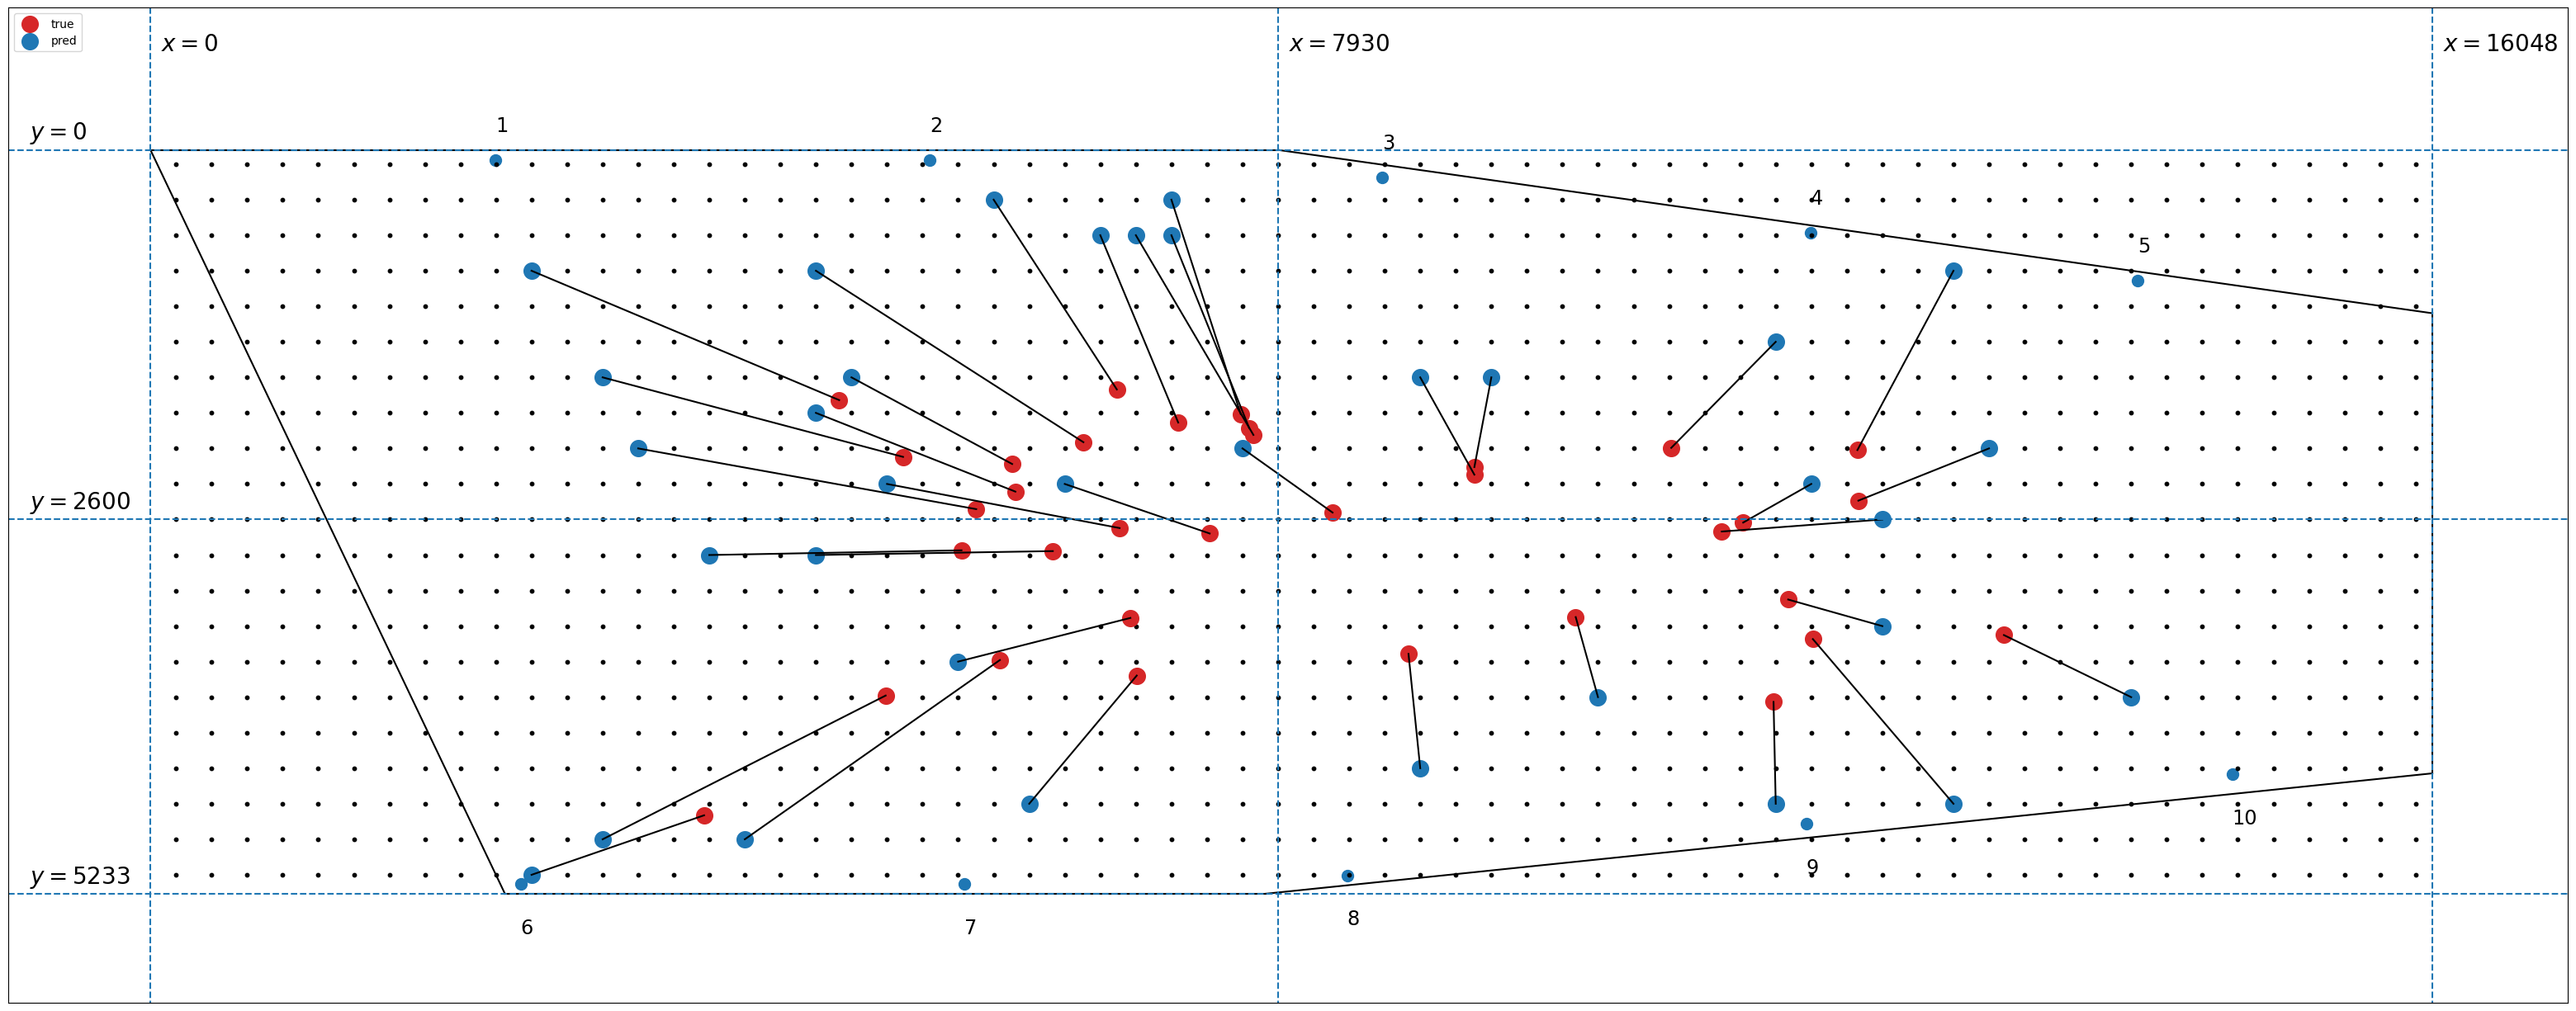

In [ ]:
# plot of predicted and true value
plot_test_pred(leakage.to_numpy(), y.to_numpy())

In [ ]:
# seems to me that i have missed some scaling value as the prediction kind of follows the pattern of true values 
# but skewed by a constant factor